In [31]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller

# O Δείκτης Τιμών Καταναλωτή (CPI)

Στην Οικονομική Επιστήμη ο Δείκτης Τιμών Καταναλωτή (ΔΤΚ) ή τιμάριθμος είναι ο δείκτης μέτρησης του κόστους ζωής και 
διαβίωσης που βασίζεται στις μεταβολές των λιανικών τιμών των περισσότερων αγαθών ή υπηρεσιών. Μετρά τη διακύμανση 
των τιμών στα αγαθά και τις υπηρεσίες που περιλαμβάνονται στο "καλάθι του καταναλωτή"

Οποιαδήποτε προσαρμογή διαφόρων οικονομικών μεγεθών στον τιμάριθμο ονομάζεται τιμαριθμοποίηση. Χαρακτηριστική 
περίπτωση τιμαριθμοποίησης είναι η λεγόμενη «αυτόματη τιμαριθμική αναπροσαρμογή», που γίνεται κατά περιοδική άνοδο 
του τιμαρίθμου και που αφορά μισθούς υπαλλήλων και ημερομίσθια εργατών.

Τέτοιοι δείκτες αφορούν τόσο αγαθά όσο και υπηρεσίες που παρέχονται σε καταναλωτές και λαμβάνονται περιοδικά επί 
ενός δείγματος πληθυσμού με στόχο τον καθορισμό εκείνων των αγαθών που συνθέτουν το λεγόμενο "καλάθι της νοικοκυράς" 
ή το "καλάθι του καταναλωτή". Στη συνέχεια, αφού προσδιοριστούν αυτά τα αγαθά, παρακολουθούνται και καταγράφονται οι 
τιμές τους, οι οποίες ακολούθως σταθμίζονται ανάλογα της σπουδαιότητας των προϊόντων δίνοντας τον γενικό δείκτη. 
Αυτός συγκρινόμενος με προηγούμενο που συνήθως αποτελεί τον αρχικό (ή έτους βάσης), προσδιορίζει την ποσοστιαία αύξηση 
ή μείωση

# MONTHLY CPI VALUES WORLDWIDE

In [2]:
df= pd.read_csv('CPI - monthly data.csv')
df.head(5)

,Month,Price,Change
0,Aug 1992,52.00,-
1,Sep 1992,52.43,0.83%
2,Oct 1992,51.92,-0.97%
3,Nov 1992,49.86,-3.97%
4,Dec 1992,49.89,0.06%


In [3]:
df['Time'] =  pd.to_datetime(df['Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)

In [4]:
df.drop(['Month'], inplace=True, axis=1)

In [5]:
df

,Price,Change,Time
0,52.00,-,1992-08-01
1,52.43,0.83%,1992-09-01
2,51.92,-0.97%,1992-10-01
3,49.86,-3.97%,1992-11-01
4,49.89,0.06%,1992-12-01
...,...,...,...
355,238.60,17.66%,2022-03-01
356,226.71,-4.98%,2022-04-01
357,224.73,-0.87%,2022-05-01
358,230.23,2.45%,2022-06-01


In [37]:
fig = px.line(df, x="Time", y="Price", title="CPI Price through time")
fig.update_traces(mode="markers+lines")
fig.show()

Παρατηρείται ιδιαίτερα ανοδική αύξηση αρχές του 2002 μέχρι το καλοκαίρι του 2008.
Το 2008 υπάρχει ραγδαία μείωση, oι βασικοί παράγοντες πίσω από αυτή την πτώση ήταν οι βελτιωμένες δημοσιονομικές επιδόσεις, οι καθοδικές πιέσεις τιμών από τον αυξημένο παγκόσμιο ανταγωνισμό, τα βελτιωμένα πλαίσια νομισματικής πολιτικής και η ανεξαρτησία των κεντρικών τραπεζών σε πολλές χώρες. Στην συνέχεια, η ανάκαμψη έρχεται σταθερά μέχρι το 2011, όπου μετά υπάρχει μια πτώση η οποία κορυφώνεται το καλοκαίρι του 2014 λόγω των χαμηλών τιμών στο φαγητό και στα καύσιμα. Το 2016 ξεκινά η ανάκαμψη η οποία σταματά στα τέλη του 2018, και από εκεί και μετά ξεκινά μια πτώση η οποία κορυφώνεται τον Απρίλη του 2020, δηλαδή στην πρώτη καραντίνα. Από εκεί και μετά, παρουσιάζεται ραγδαία αύξηση.

In [7]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [8]:
df['Change'] = df['Change'].str.rstrip("%").astype(float)/100 # converting percentage to numeric

Text(0.5, 1.0, 'CPI Percentage of Change through time')

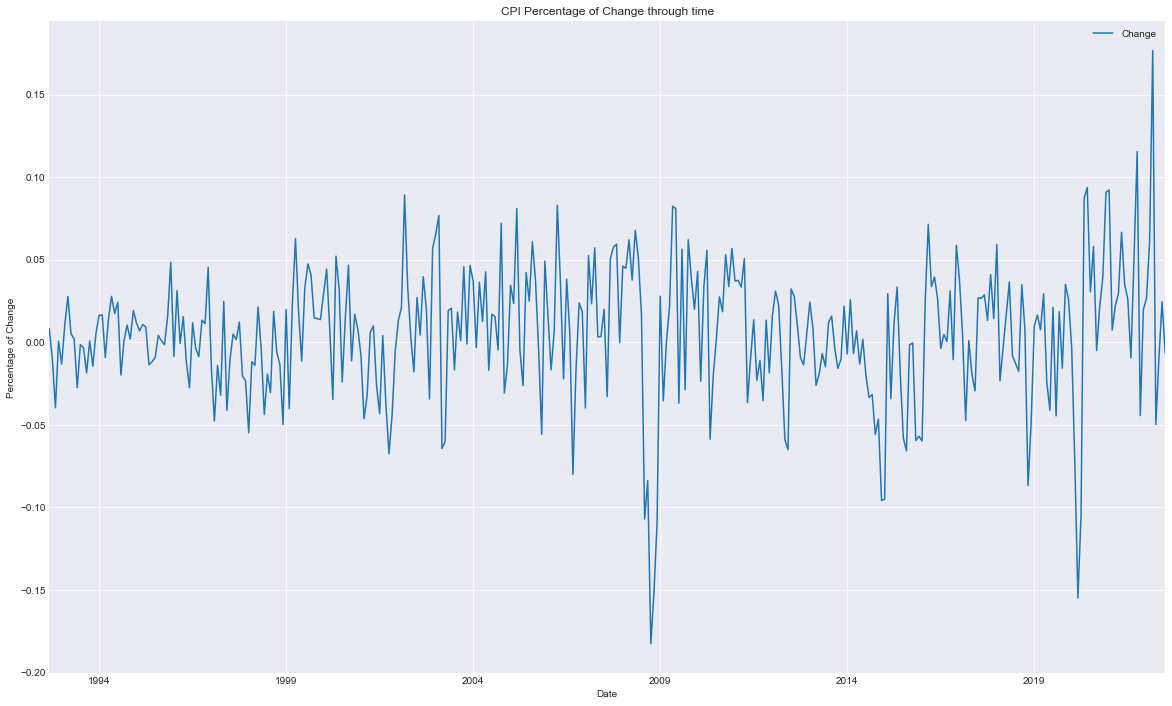

In [9]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Time', y = 'Change')
plt.xlabel('Date')
plt.ylabel('Percentage of Change')
plt.title("CPI Percentage of Change through time")

In [10]:
df

,Price,Change,Time
1,52.43,0.0083,1992-09-01
2,51.92,-0.0097,1992-10-01
3,49.86,-0.0397,1992-11-01
4,49.89,0.0006,1992-12-01
5,49.23,-0.0132,1993-01-01
...,...,...,...
355,238.60,0.1766,2022-03-01
356,226.71,-0.0498,2022-04-01
357,224.73,-0.0087,2022-05-01
358,230.23,0.0245,2022-06-01


In [11]:
df = df.set_index(['Time'])

In [12]:
print("Is the CPI monthly price and change values stationary ?")
for col in df.columns:
    result = adfuller(df[col])
    print('p-value for ' + col + ' : %f' % result[1])
    
print('if p-value > 0.05 then the timeseries is not stationary. Therefore the CPI monthly price timeseries is not stationary.')
print('But the CPI mothly change timeseries is stationary')

Is the CPI monthly price and change values stationary ?
p-value for Price : 0.849580
p-value for Change : 0.000000
if p-value > 0.05 then the timeseries is not stationary. Therefore the CPI monthly price timeseries is not stationary.
But the CPI mothly change timeseries is stationary


# MONTHLY CPI VALUES FOR GREECE

In [38]:
df= pd.read_csv('GREEK CPI - monthly data.csv')
df.head(5)

,Date,Overall index,Rate of change % from month to month,Annual rate of change %,Readjustment of rents(75%),Rate of change % with the index of the previous December,Annual average index,Annual average rate of change %
0,2001/01,72.38,-1.6,3.4,2.6,-1.6,71.91,3.2
1,2001/02,72.31,-0.1,3.5,2.6,-1.7,72.12,3.3
2,2001/03,73.73,2.0,3.0,2.3,0.2,72.30,3.3
3,2001/04,74.42,0.9,3.5,2.6,1.2,72.51,3.3
4,2001/05,74.74,0.4,3.6,2.7,1.6,72.73,3.4


In [39]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y%m', errors='ignore', infer_datetime_format=True)

In [40]:
df.head()

,Date,Overall index,Rate of change % from month to month,Annual rate of change %,Readjustment of rents(75%),Rate of change % with the index of the previous December,Annual average index,Annual average rate of change %
0,2001-01-01,72.38,-1.6,3.4,2.6,-1.6,71.91,3.2
1,2001-02-01,72.31,-0.1,3.5,2.6,-1.7,72.12,3.3
2,2001-03-01,73.73,2.0,3.0,2.3,0.2,72.30,3.3
3,2001-04-01,74.42,0.9,3.5,2.6,1.2,72.51,3.3
4,2001-05-01,74.74,0.4,3.6,2.7,1.6,72.73,3.4


In [41]:
df['Overall index'] = pd.to_numeric(df['Overall index'])

In [43]:
fig = px.line(df, x="Date", y="Overall index", title="CPI Price through time")
fig.update_traces(mode="markers+lines")
fig.show()

Παρατηρείται συνεχής σκαμπανέβασμα το οποίο έχει ανοδική τάση. Υπάρχει μεγάλο άλμα από τον Φεβρουάριο του 2010 μέχρι το καλοκαίρι του 2010 και ακόμα μεγαλύτερο από τον Άυγουστο του 2021 μέχρι το καλοκαίρι του 2022. Για το τελευταίο χρονικό διάστημα, η αύξηση παρατηρείται καθώς ήταν ο πρώτος χειμώνας μετά τον covid.

# YEARLY CPI VALUES FOR GREECE

In [44]:
df= pd.read_csv('GREEK CPI - annual data.csv')
df.head(5)

,Date,Overall index,Annual average rate of change %
0,2001,74.14,3.4
1,2002,76.83,3.6
2,2003,79.54,3.5
3,2004,81.84,2.9
4,2005,84.75,3.5


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             22 non-null     int64  
 1   Overall index                    22 non-null     float64
 2   Annual average rate of change %  22 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 656.0 bytes


In [46]:
df['Overall index'] = pd.to_numeric(df['Overall index'])

In [48]:
fig = px.line(df, x="Date", y="Overall index", title="CPI Price through time")
fig.update_traces(mode="markers+lines")
fig.show()